# Customer Segmentation

**Libraries**

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## 1. Read files

In [2]:
data = pd.read_csv('Mall_Customers.csv')

In [3]:
#top 5 rows
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# dimsion of dataset
data.shape

(200, 5)

In [5]:
# last 5  rows
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [6]:
#data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
# check null values
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## 2. EDA

#### Gender

##### Gender Distribution

In [8]:
data.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

##### Gender - income distribution

In [9]:
most_income = data.groupby("Gender")['Annual Income (k$)'].sum()
most_income

Gender
Female    6636
Male      5476
Name: Annual Income (k$), dtype: int64

##### Gender -spending distribution

In [10]:
gspending = data.groupby("Gender")['Spending Score (1-100)'].sum()
gspending

Gender
Female    5771
Male      4269
Name: Spending Score (1-100), dtype: int64

**Comment**  
the females  have most income and spend more money 

##### Customer ID

In [11]:
data['CustomerID'].nunique()

200

**Comment**  
- we have 200 customers

##### Age

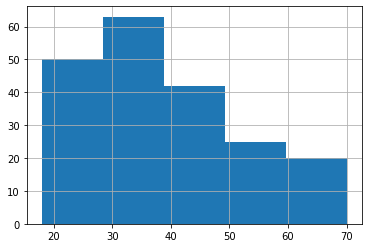

In [12]:
data.Age.hist(bins = 5)
plt.show()

##### Age - Inconme correlations

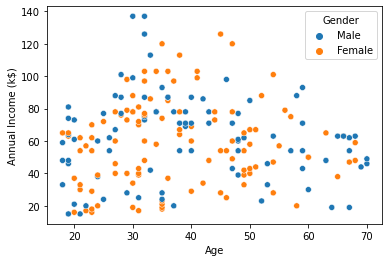

In [13]:
sns.scatterplot(data= data , x = 'Age', y = 'Annual Income (k$)', hue = 'Gender')
plt.show()

##### Age- spending

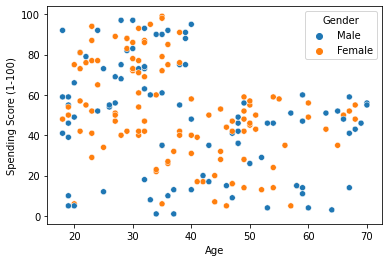

In [14]:
sns.scatterplot(data= data , x = 'Age', y = 'Spending Score (1-100)', hue = 'Gender')
plt.show()

##### Overal Statistic

In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


###### Data correlation

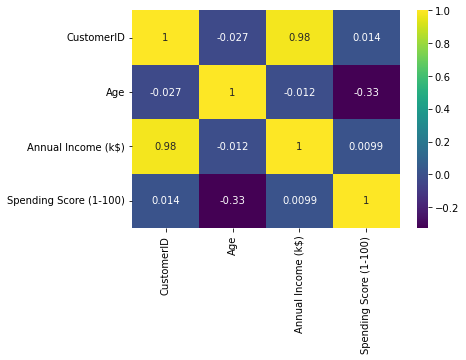

In [16]:
sns.heatmap(data.corr(), annot = True, cmap = 'viridis')
plt.show()

## 3. Select features

In [17]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [18]:
X = data[['Annual Income (k$)','Spending Score (1-100)']]

## 4. Kmeans

In [21]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

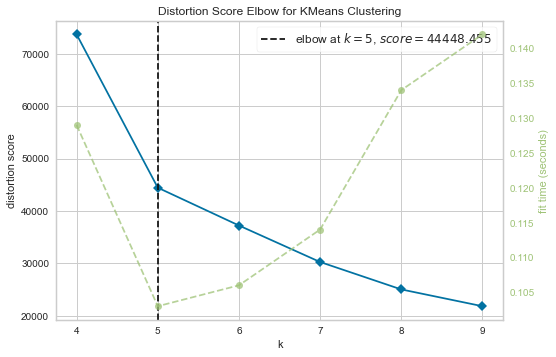

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [25]:
model = KMeans()
visualizar = KElbowVisualizer(model, k = (4,10))
visualizar.fit(X)
visualizar.show()

**Comment**  
k = 5

In [29]:
kmeans = KMeans(n_clusters= 5)
pred = kmeans.fit_predict(X)

In [31]:
data['predictions'] = pred
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),predictions
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


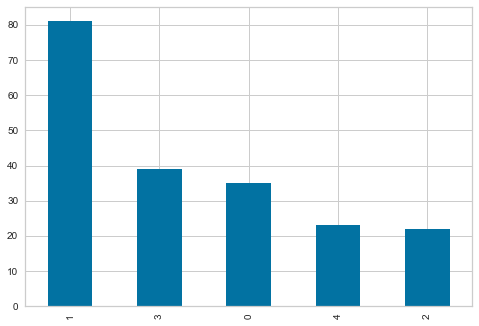

In [33]:
data.predictions.value_counts().plot(kind = 'bar');

In [51]:
data.predictions.value_counts()

1    81
3    39
0    35
4    23
2    22
Name: predictions, dtype: int64

### 4.1 cluster with all data

#### Data Preparation

In [52]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [53]:
data["Gender"] = data['Gender'].map({'Male':1, 'Female': 0})
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),predictions
0,1,1,19,15,39,4
1,2,1,21,15,81,2
2,3,0,20,16,6,4
3,4,0,23,16,77,2
4,5,0,31,17,40,4


##### feature selection

In [55]:
X1 = data.drop(['CustomerID'], axis = 1)

##### Buid a cluster

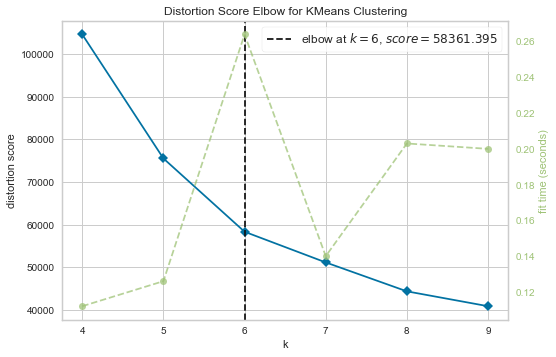

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [56]:
model = KMeans()
visualizar = KElbowVisualizer(model, k = (4,10))
visualizar.fit(X1)
visualizar.show()

**Commnet**  
n_cluster = 6

In [57]:
kmeans = KMeans(n_clusters= 6)
clusters= kmeans.fit_predict(X1)

In [58]:
data['Cluster_all']= clusters 
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),predictions,Cluster_all
0,1,1,19,15,39,4,5
1,2,1,21,15,81,2,4
2,3,0,20,16,6,4,5
3,4,0,23,16,77,2,4
4,5,0,31,17,40,4,5


In [59]:
data["Cluster_all"].value_counts()

3    45
2    39
1    38
0    35
4    22
5    21
Name: Cluster_all, dtype: int64

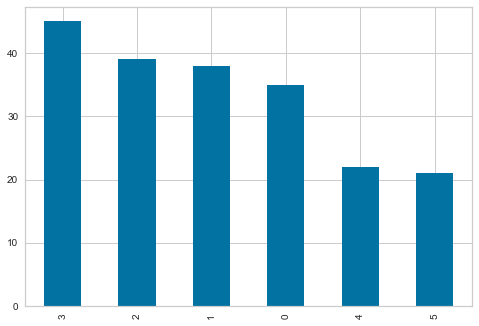

In [60]:
data.Cluster_all.value_counts().plot(kind = 'bar');